In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
                 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df=pd.concat([train_set,test_set])

In [8]:
df.shape

(48842, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [10]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [11]:
df.replace(' ?',np.nan,inplace=True)

In [12]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [13]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

In [14]:
df['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [15]:
df=df.replace({' <=50K':0,' <=50K.':0,' >50K':1,' >50K.':1})

In [16]:
df['wage_class'].unique()

array([0, 1], dtype=int64)

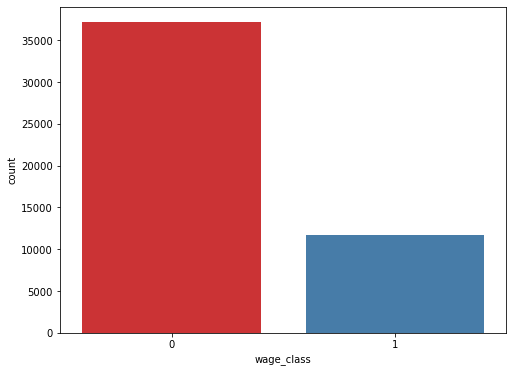

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(df['wage_class'],palette="Set1")

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [19]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
df=df.replace(' Without-pay',' Never-worked')

In [21]:
df.workclass.value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Never-worked           31
Name: workclass, dtype: int64

In [22]:
df['workclass'].fillna('0',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

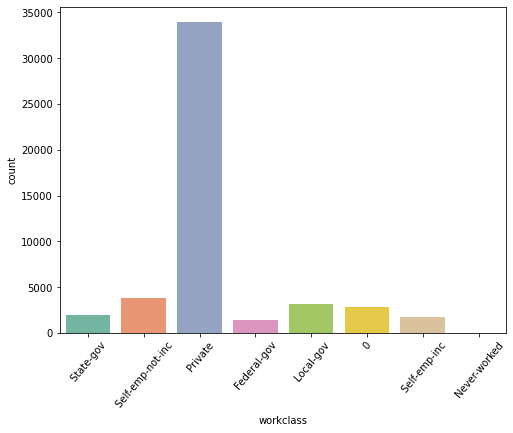

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(df['workclass'],palette='Set2')
plt.xticks(rotation=50)

In [24]:
df['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [25]:
df['fnlwgt']=df['fnlwgt'].apply(lambda x :np.log1p(x))

In [26]:
df['fnlwgt'].describe()

count    48842.000000
mean        11.982958
std          0.630817
min          9.416216
25%         11.674632
50%         12.090356
75%         12.378525
max         14.214556
Name: fnlwgt, dtype: float64

In [27]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [28]:
df.education.value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [29]:
def primary_school(x):
    if x in [' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th']:
        return 'Primary'
    else:
        return x

In [30]:
df['education'] = df['education'].apply(primary_school)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

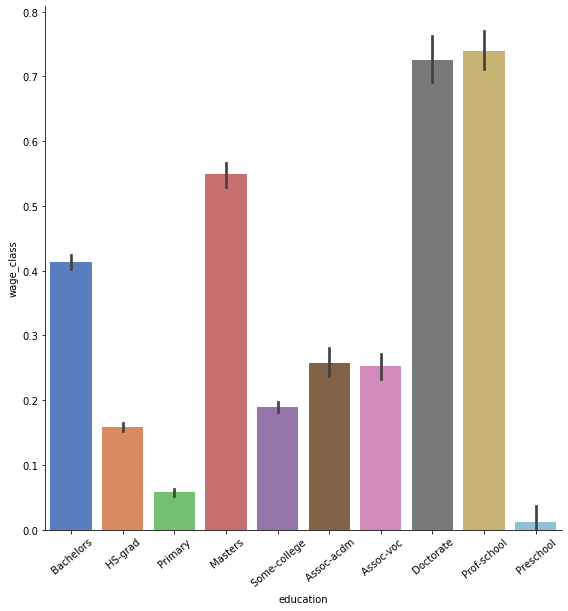

In [31]:
sns.catplot(x='education',y='wage_class',data=df,height=8,palette='muted',kind='bar')
plt.xticks(rotation=40)

In [32]:
df['marital_status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

In [33]:
df['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

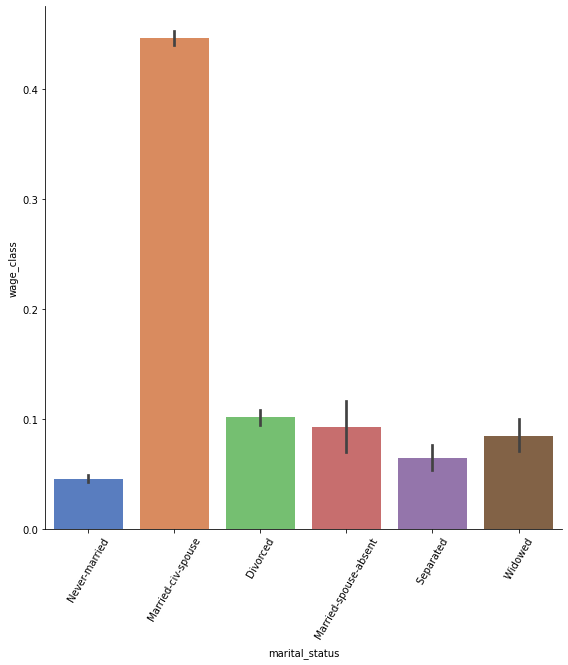

In [34]:
sns.catplot(x='marital_status',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [35]:
df['occupation'].fillna('0',inplace=True)

In [36]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
0                     2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [37]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

In [38]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
0                     2824
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

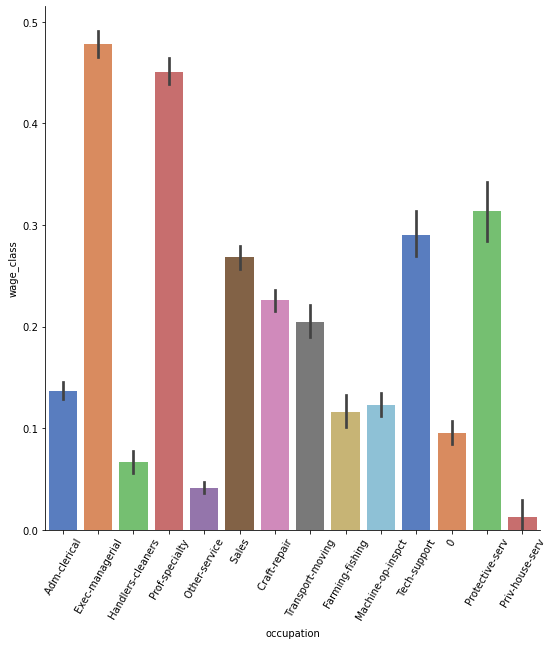

In [39]:
sns.catplot(x='occupation',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [40]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [41]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [42]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [43]:
df['native_country'] = df['native_country'].apply(native)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

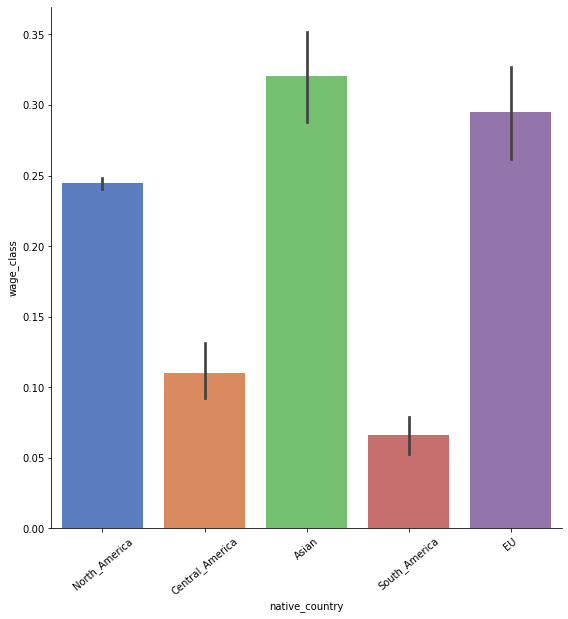

In [44]:
sns.catplot(x='native_country',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=40)

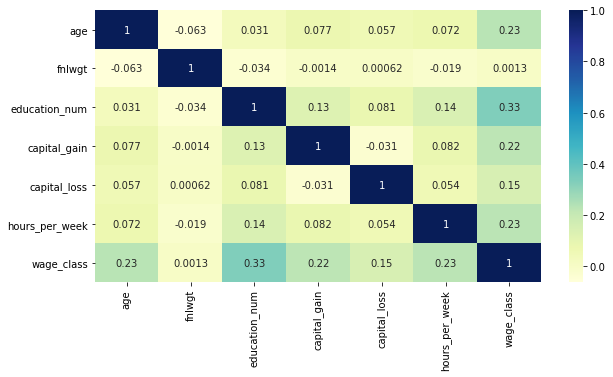

In [45]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [46]:
X = df.drop(['wage_class'],axis=1)
y = df['wage_class']

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  int64  
 11  capital_loss    48842 non-null  int64  
 12  hours_per_week  48842 non-null  int64  
 13  native_country  47985 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 6.8+ MB


In [48]:
X_d = pd.get_dummies(X)

In [49]:
X_d.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_0', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'education_Primary', 'marital_status_ Divorced',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-o

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_d)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=101)

In [54]:
param=[{'learning_rate':[0.01,0.001],
       'max_depth':[3,5,10],
       'n_estimators':[10,50,100,200]}]

In [57]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
Xbc = XGBClassifier()
Gcv = GridSearchCV(Xbc,param,scoring='accuracy',cv=5,n_jobs=3,verbose=3)
Gcv.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  9.4min finished
C:\Users\sampa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [58]:
Gcv.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

In [59]:
XBC = XGBClassifier(learning_rate=0.01,max_depth=10,n_estimators=200)
XBC.fit(x_train,y_train)

[13:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
XBC.score(x_test,y_test)

0.8706111167980346

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
y_pred = XBC.predict(x_test)

In [64]:
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}')
print('*'*50)
print(f'Confusion Matrix:{confusion_matrix(y_test,y_pred)}')
print('*'*50)
print(f'Classification Report: {classification_report(y_test,y_pred)}')

Accuracy Score:0.8706111167980346
**************************************************
Confusion Matrix:[[7057  355]
 [ 909 1448]]
**************************************************
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.95      0.92      7412
           1       0.80      0.61      0.70      2357

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.81      9769
weighted avg       0.87      0.87      0.86      9769

